In [3]:
#Academic work of Numerical Differential Equations
#Federal University of Minas Gerais

""" Utils """
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

# Introduction to chaos -The Lorenz attractor

Typical Lorenz Attractor: 
- Dependence on sigma σ (σ = 5, β = 8/3, ρ = 28), (σ = 20, β = 8/3, ρ = 28).
- Dependence on beta β (σ = 10, β = 4/3, ρ = 28), (σ = 10, β = 16/3, ρ = 28).
- Dependence on rho ρ (σ = 10, β = 8/3, ρ = 14), (σ = 10, β = 8/3, ρ = 56).

## Introdução
(pt-br) O professor do MIT, Edward Lorenz em 1963, publicou um artigo sobre sua pesquisa sobre um modelo meteorológico. Usando equações diferenciais, Lorenz desenvolveu um sistema simplificado para modelar certos fenômenos relacionados ao clima. No entanto, para certos conjuntos de parâmetros, ao analisar as soluções plotadas num gráfico com tempo como a variável independente, nota-se que para quaisquer condições iniciais um ponto movendo-se no espaço traça uma curva que sempre converge e se mantém na superfície de duas asas, sendo assim o sistema foi descrito como um atrator. Porém como veremos, quaisquer ligeiras mudanças nos parâmetros provocam caos no sistema, oscilações irregulares e aperiódicas.

In [4]:
"""Compute the time-derivative of a Lorenz system."""
def xt(x, y, z, t):
    return (sigma*(y - x))

def yt(x, y, z, t):
    return (rho*x - y - x*z)

def zt(x, y, z, t):
    return (-1*(beta*z) + x*y)

In [5]:
# choose a different color for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, 10))
def lorenz_ode_plot_components (x, y, z):
    plt.figure (figsize = (8.5,8.5))
    plt.plot ( t, x, linewidth = 1, color = 'b' ) 
    plt.plot ( t, y, linewidth = 1, color = 'r' )
    plt.plot ( t, z, linewidth = 1, color = 'g' )
    plt.grid ( True )
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- x(t), y(t), z(t) --->' )
    plt.title ( 'Lorenz Time Series Plot' )
    
    plt.legend(['x','y','z'], loc = 2)
    plt.savefig ( 'lorenz_ode_components.png' )
    #print ( '' )
    #print ( '  Graphics data saved as "lorenz_ode_components.png"' )
    plt.show ( )
    return 

def lorenz_ode_plot_3d (x, y, z):
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.gca ( projection = '3d' )
    ax.plot ( x, y, z, linewidth = 0.5, color = 'r' )
    ax.grid ( True )
    ax.set_xlabel ( '<--- x(t) --->' )
    ax.set_ylabel ( '<--- y(t) --->' )
    ax.set_zlabel ( '<--- z(t) --->' )
    ax.set_title ( 'Lorenz 3D Plot' )
    
    plt.savefig ( 'lorenz_ode_3d.png' )
    #print ( '' )
    #print ( '  Graphics data saved as "lorenz_ode_3d.png"' )
    plt.show ( )
    return

## As Equações de Lorenz
(pt-br) As equações de Lorenz podem ser escritas como as seguintes equações diferenciais:
\begin{equation}
    \frac{dx}{dt} = -\sigma x + \sigma y,
\end{equation}
\begin{equation}
    \frac{dy}{dt} = \rho x - y - xz,
\end{equation}
\begin{equation}
    \frac{dz}{dt} = -\beta z + xy,
\end{equation}

onde $\sigma$, $\rho$ e $\beta$ são constantes. A constante $\sigma$ é chamada de "número de Prandtl" e é uma descrição das características físicas do sistema, como a viscosidade e a condutividade térmica no caso da convecção. Já $\rho$ representa um parâmetro de controle, que é a diferença entre as forças motrizes extremas no sistema. Por fim, $\beta$ representa um valor que descreve a forma da região onde o atrator de Lorenz está contido.

## Dependence sigma, beta, rho using RK4

In [6]:
def RungeKutta4(xt,yt,zt,n = 3500, T = 35):
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.zeros(n+1)
    t = np.zeros(n+1)
    
    x[0] = 8.0
    y[0] = 1.0
    z[0] = 1.0
    t[0] = 0
    dt = T/float(n) #0.01
    
    #Compute the approximate solution at equally spaced times.
    for k in range (n):
    
        t[k+1] = t[k] + dt
        
        k1 = xt(x[k], y[k], z[k], t[k])
        l1 = yt(x[k], y[k], z[k], t[k])
        m1 = zt(x[k], y[k], z[k], t[k])

        k2 = xt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        l2 = yt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))
        m2 = zt((x[k] + 0.5*k1*dt), (y[k] + 0.5*l1*dt), (z[k] + 0.5*m1*dt), (t[k] + dt/2))

        k3 = xt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        l3 = yt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))
        m3 = zt((x[k] + 0.5*k2*dt), (y[k] + 0.5*l2*dt), (z[k] + 0.5*m2*dt), (t[k] + dt/2))

        k4 = xt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        l4 = yt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))
        m4 = zt((x[k] + k3*dt), (y[k] + l3*dt), (z[k] + m3*dt), (t[k] + dt))

        x[k+1] = x[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y[k+1] = y[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z[k+1] = z[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)

    return x, y, z, t


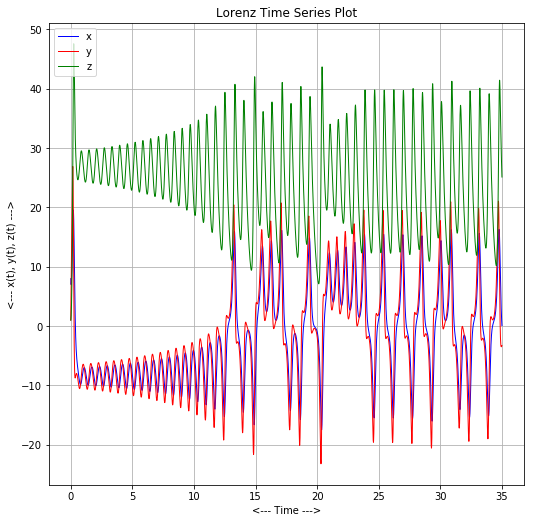

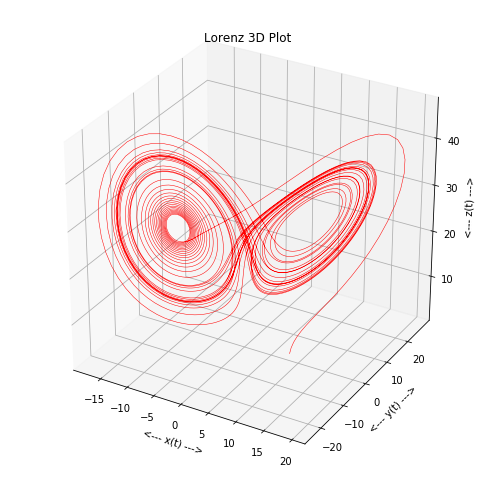

In [7]:
""" Initial values unchanged """
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

### PLOTS RK4:  

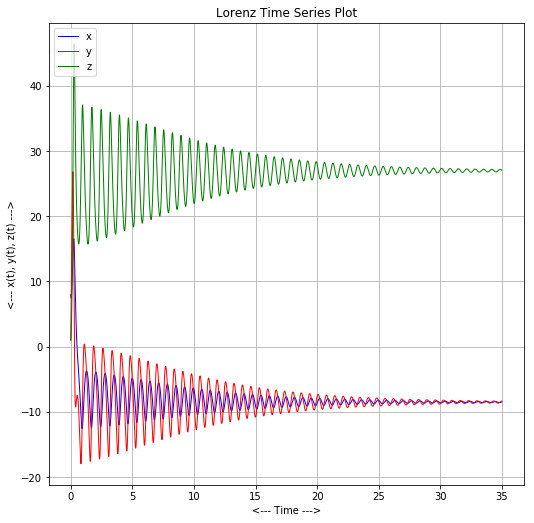

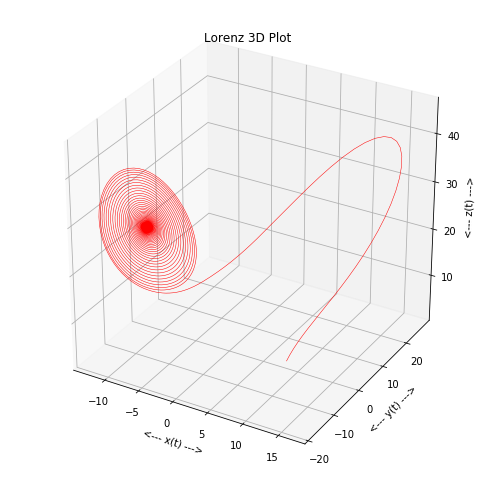

In [8]:
""" First: Dependence on sigma σ using Runge Kutta 4""" 
sigma = 5.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

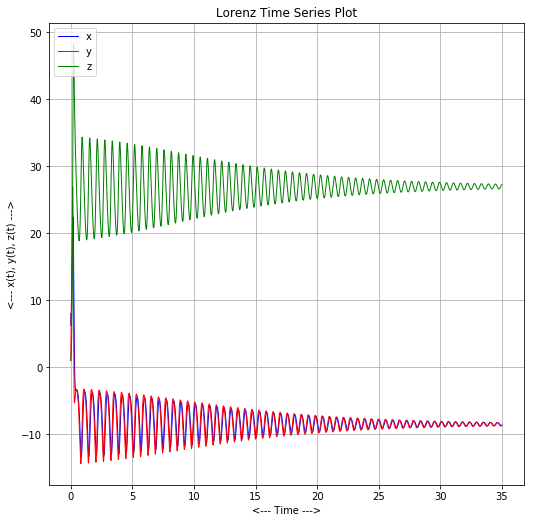

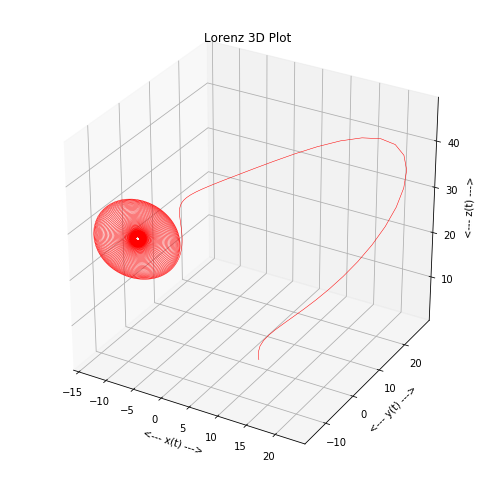

In [9]:
""" Second: Dependence on sigma σ using Runge Kutta 4""" 
sigma = 20.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

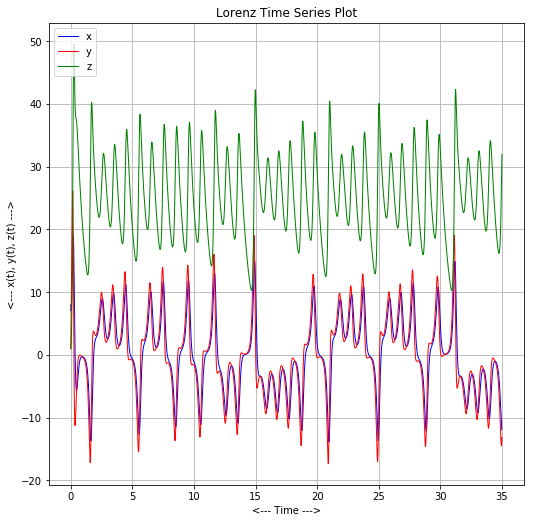

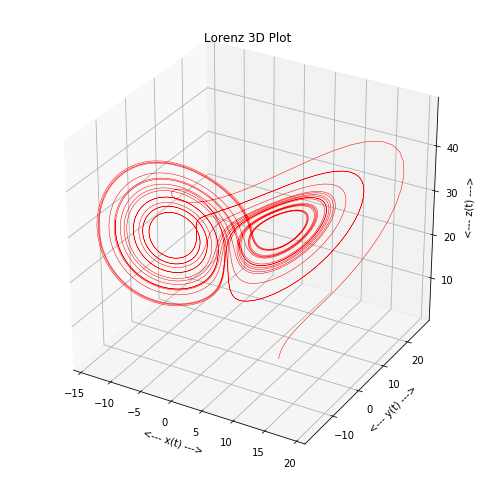

In [10]:
""" First: Dependence on beta β using Runge Kutta 4""" 
sigma = 10.0
beta = 4.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

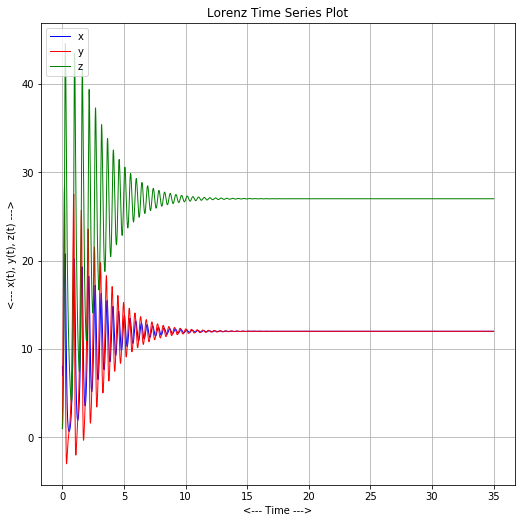

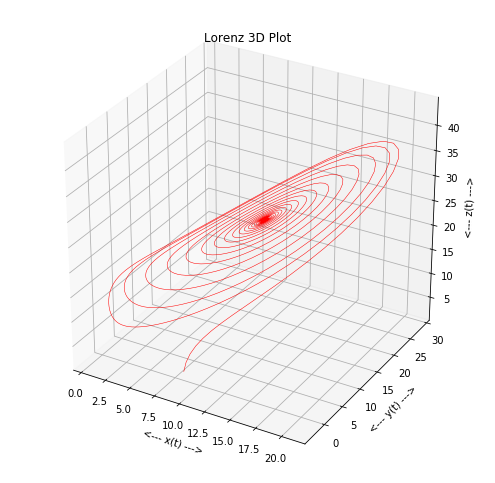

In [11]:
""" Second: Dependence on beta β using Runge Kutta 4""" 
sigma = 10.0
beta = 16.0/3.0
rho = 28.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

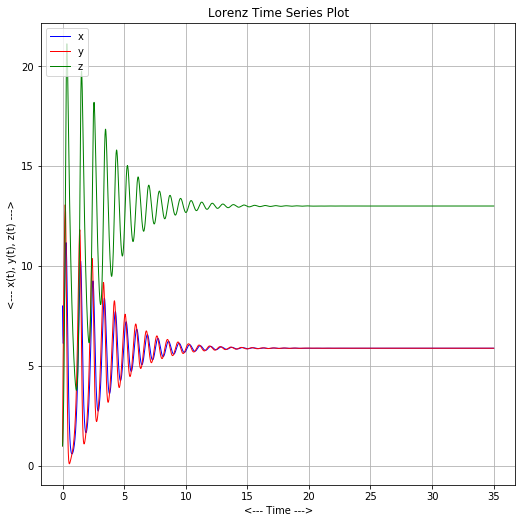

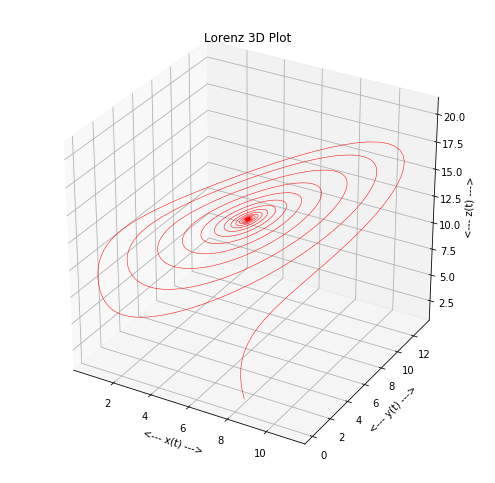

In [12]:
""" First: Dependence on rho ρ using Runge Kutta 4""" 
sigma = 10.0
beta = 8.0/3.0
rho = 14.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

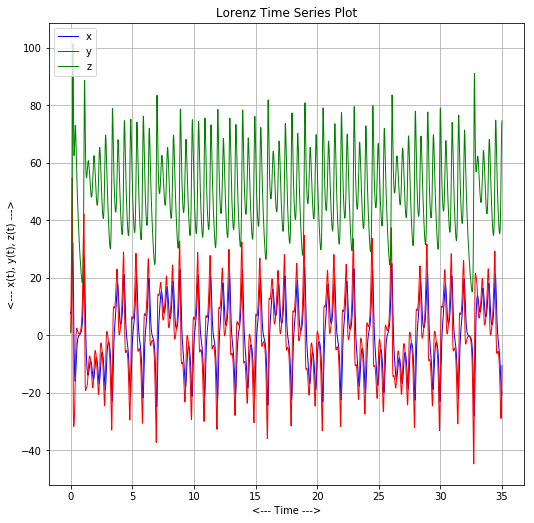

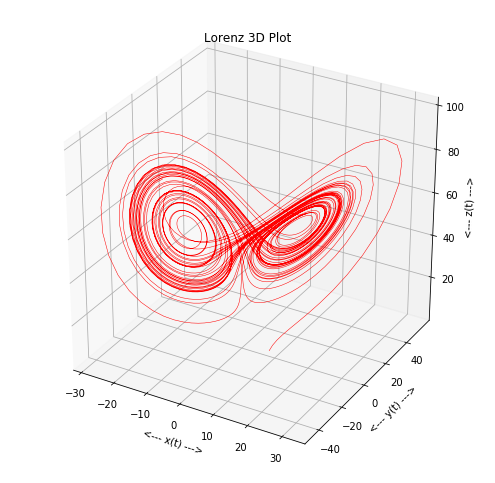

In [13]:
""" Second: Dependence on rho ρ using Runge Kutta 4""" 
sigma = 10.0
beta = 8.0/3.0
rho = 56.0

x, y, z, t = RungeKutta4(xt,yt,zt)

lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

## Dependence sigma, beta, rho using Predictor-Corrector

In [14]:
def PredictorCorrector(xt, yt, zt,n = 3500, T = 35):
    x = np.zeros(n+2)
    y = np.zeros(n+2)
    z = np.zeros(n+2)
    t = np.zeros(n+2)
    
    x[0] = 8.0
    y[0] = 1.0
    z[0] = 1.0
    t[0] = 0
    dt = T/float(n) #0.01
    
    x, y, z, t = RungeKutta4(xt, yt, zt)
    
    f0_dx = xt(x[0],y[0],z[0],t[0])
    f0_dy = yt(x[0],y[0],z[0],t[0])
    f0_dz = zt(x[0],y[0],z[0],t[0])
    
    f1_dx = xt(x[1],y[1],z[1],t[1])
    f1_dy = yt(x[1],y[1],z[1],t[1])
    f1_dz = zt(x[1],y[1],z[1],t[1])
    
    f2_dx = xt(x[2],y[2],z[2],t[2])
    f2_dy = yt(x[2],y[2],z[2],t[2])
    f2_dz = zt(x[2],y[2],z[2],t[2])
    
    f3_dx = xt(x[3],y[3],z[3],t[3])
    f3_dy = yt(x[3],y[3],z[3],t[3]) 
    f3_dz = zt(x[3],y[3],z[3],t[3])
    
    for k in range(n-1,0,-1):
        #Predictor: The fourth-order Adams-Bashforth technique, an explicit four-step method:
        x[k+1] = x[k] + (dt/24) *(55*f3_dx - 59*f2_dx + 37*f1_dx - 9*f0_dx)
        y[k+1] = y[k] + (dt/24) *(55*f3_dy - 59*f2_dy + 37*f1_dy - 9*f0_dy)
        z[k+1] = z[k] + (dt/24) *(55*f3_dz - 59*f2_dz + 37*f1_dz - 9*f0_dz)
        
        f4_dx = xt(x[k+1],y[k+1],z[k+1],t[k+1])
        f4_dy = yt(x[k+1],y[k+1],z[k+1],t[k+1])
        f4_dz = zt(x[k+1],y[k+1],z[k+1],t[k+1])
        
        #Corrector: The fourth-order Adams-Moulton technique, an implicit three-step method:              
        x[k+1] = x[k] + (dt/24) *(9*xt(x[k+1],y[k+1],z[k+1],t[k+1]) + 19*f3_dx - 5*f2_dx + f1_dx)
        y[k+1] = y[k] + (dt/24) *(9*yt(x[k+1],y[k+1],z[k+1],t[k+1]) + 19*f3_dy - 5*f2_dx + f1_dy)
        z[k+1] = z[k] + (dt/24) *(9*yt(x[k+1],y[k+1],z[k+1],t[k+1]) + 19*f3_dz - 5*f2_dx + f1_dz)
    
    return x, y, z, t

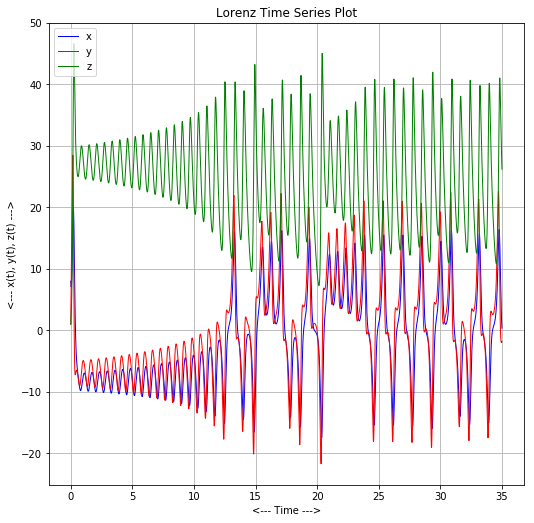

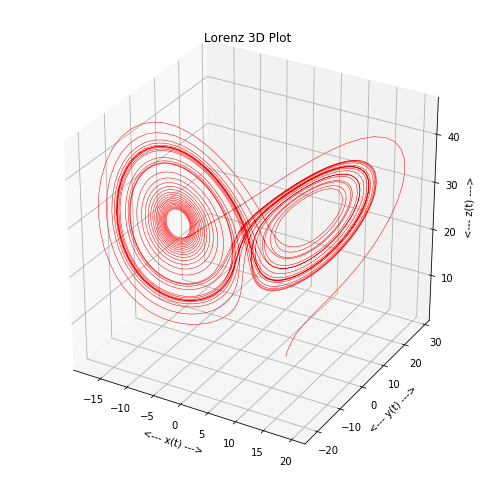

In [15]:
""" Initial values unchanged """
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

### PLOTS Adams-Bashfort-Moulton: 

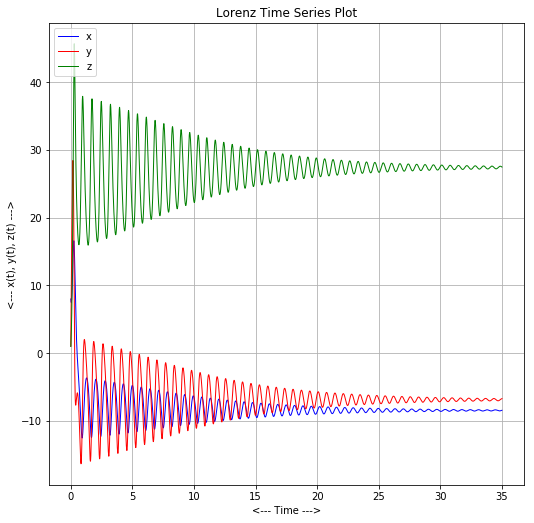

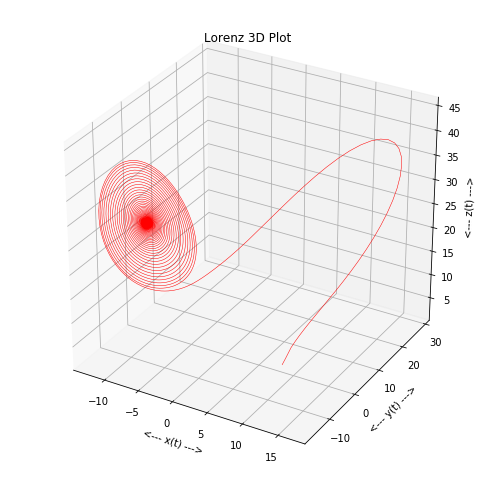

In [16]:
""" First: Dependence on sigma σ """
sigma = 5.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

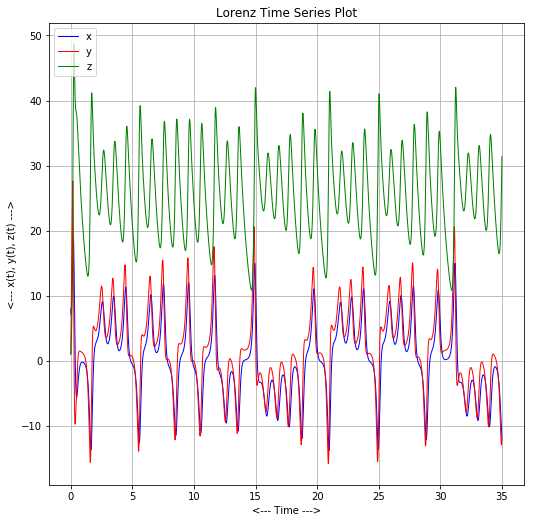

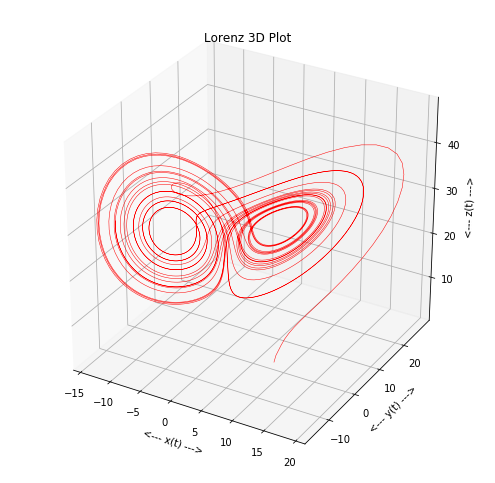

In [17]:
""" First: Dependence on beta β """ 
sigma = 10.0
beta = 4.0/3.0
rho = 28.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

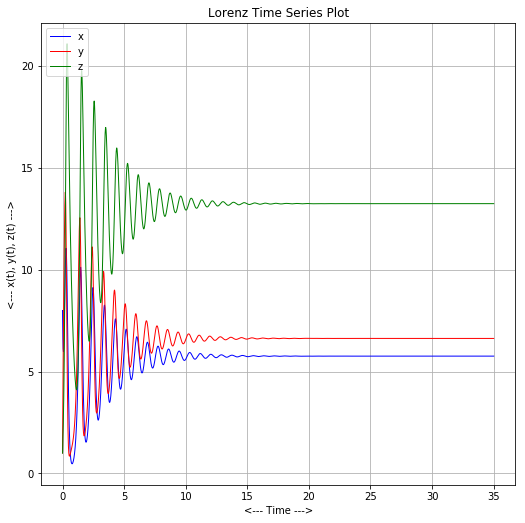

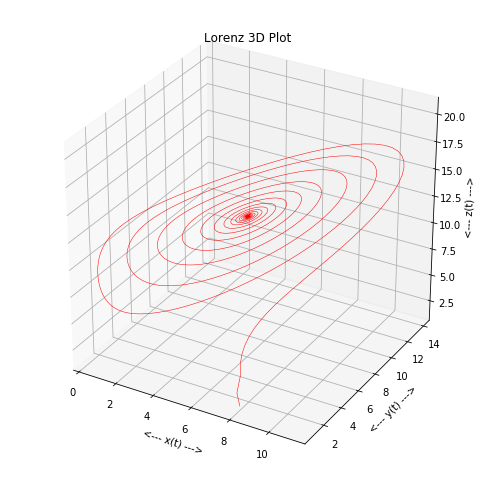

In [18]:
""" First: Dependence on rho ρ """ 
sigma = 10.0
beta = 8.0/3.0
rho = 14.0

x, y, z, t = PredictorCorrector(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

## Dependence sigma, beta, rho using Euler

#### Dado os valores para $\sigma$ , $\beta$ e $\rho$ usando o método de Euler, é possível ver que ele diverge bastante das soluções encontradas anteriormentes, Runge Kutta e preditor-corretor.

In [19]:
def Euler(xt, yt, zt, n = 3500,T = 35):
    """Solve y’= f(y,t), y(0)=y0, with n steps until t=T."""
    x = np.zeros(n+1) # x[k] is the solution at time t[k]
    y = np.zeros(n+1) # y[k] is the solution at time t[k]
    z = np.zeros(n+1) # z[k] is the solution at time t[k]
    t = np.zeros(n+1) 
    
    x[0] = 8.0
    y[0] = 1.0
    z[0] = 1.0
    t[0] = 0
    dt = T/float(n) #0.1
    
    for k in range(n):
        t[k+1] = t[k] + dt
        x[k+1] = x[k] + dt*xt(x[k], y[k], z[k], t[k])
        y[k+1] = y[k] + dt*yt(x[k], y[k], z[k], t[k])
        z[k+1] = z[k] + dt*zt(x[k], y[k], z[k], t[k])
    return x, y, z, t


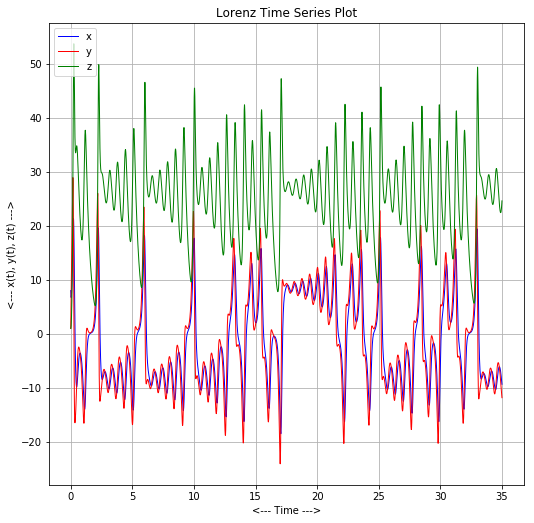

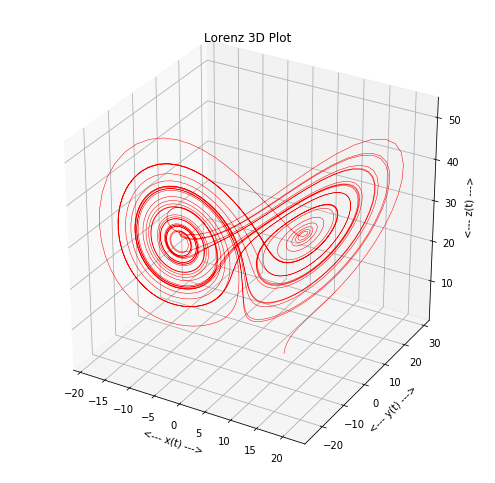

In [20]:
""" Initial values unchanged """
sigma = 10.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = Euler(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

### PLOTS EULER: 

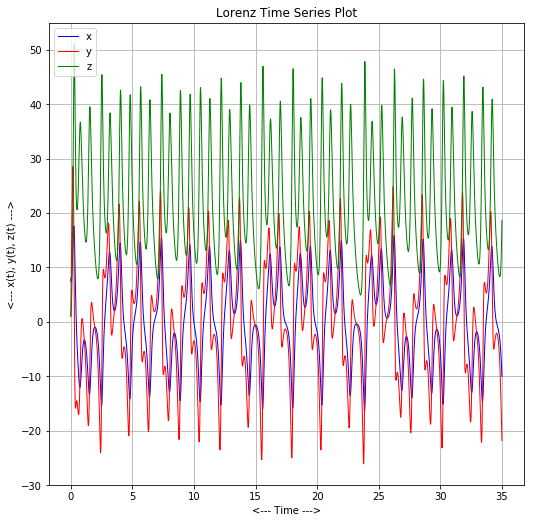

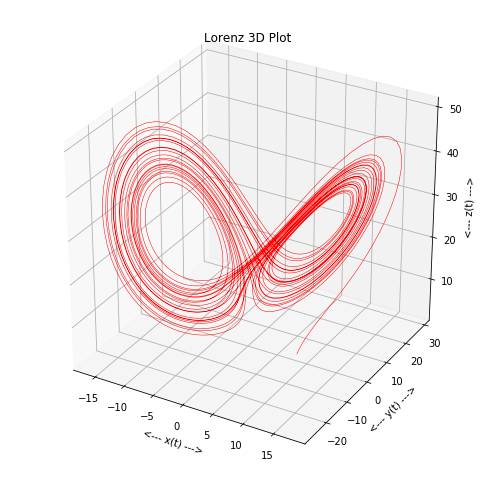

In [21]:
""" First: Dependence on sigma σ """
sigma = 5.0
beta = 8.0/3.0
rho = 28.0

x, y, z, t = Euler(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

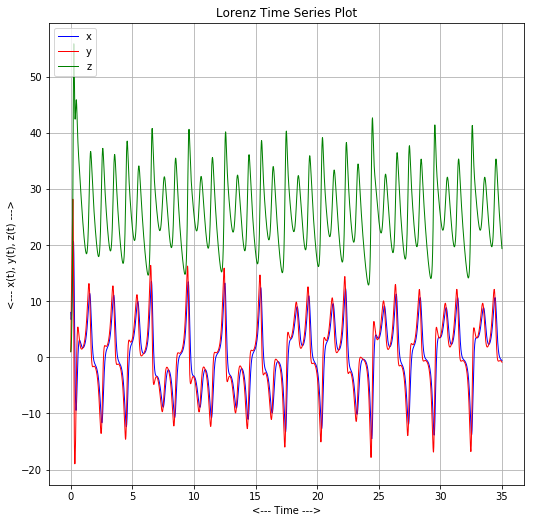

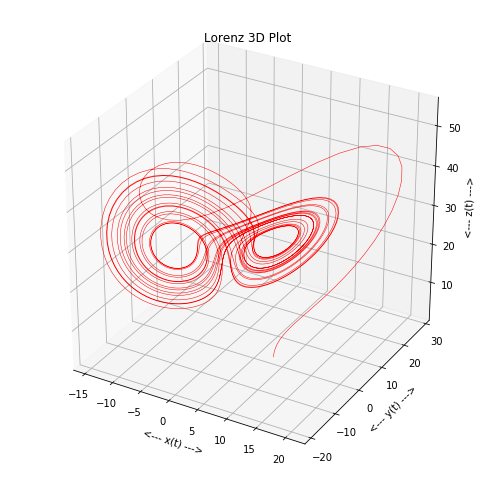

In [22]:
""" First: Dependence on beta β """ 
sigma = 10.0
beta = 4.0/3.0
rho = 28.0

x, y, z, t = Euler(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)

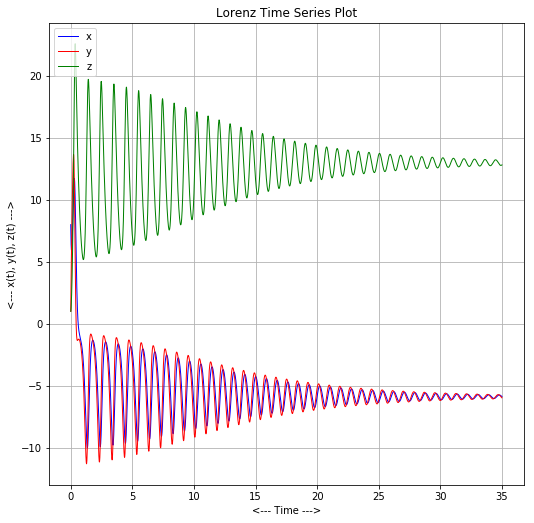

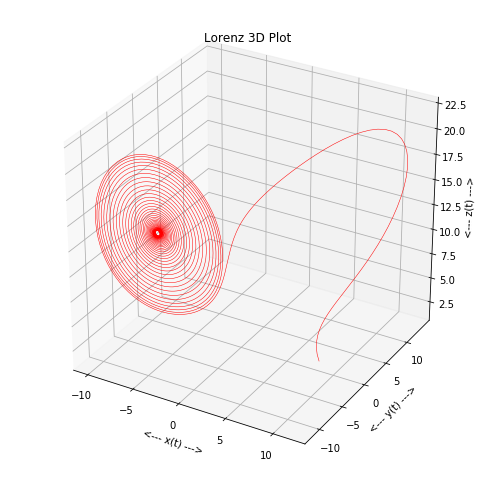

In [23]:
""" First: Dependence on rho ρ """ 
sigma = 10.0
beta = 8.0/3.0
rho = 14.0

x, y, z, t = Euler(xt, yt, zt)
lorenz_ode_plot_components (x,y,z)
lorenz_ode_plot_3d(x,y,z)